In [2]:
#import the data set
from google.colab import files 
uploaded = files.upload()

Saving applicant.csv to applicant.csv
Saving loan.csv to loan.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Loan=pd.read_csv('loan.csv')
Applicant=pd.read_csv('applicant.csv')

## Data Cleaning/Machine Learning

In [4]:
Loan.shape

(1000, 13)

In [5]:
Applicant.shape

(1000, 15)

In [6]:
loandata = pd.merge(Loan, Applicant)

In [7]:
loandata.isnull().sum()

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                          

In [8]:
loandata.shape

(1000, 27)

In [9]:
loandata = loandata.dropna(subset = ['Purpose'],how='all')

In [10]:
loandata=loandata.drop(['Other_EMI_plans','Telephone'], axis=1)

In [11]:
loandata["Property"].fillna( method ='ffill', inplace = True)

In [12]:
loandata=loandata.drop(['Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'], axis=1)

In [13]:
loandata["Savings_account_balance"].fillna( method ='ffill', inplace = True)

In [14]:
new = loandata["Has_been_employed_for_at_least"].str.split(" ", n = 1, expand = True)
loandata["AtleastEmpYear"]= new[0]


In [15]:
loandata["AtleastEmpYear"].fillna( method ='ffill', inplace = True)

In [16]:
loandata.isnull().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                          0
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                         0
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
Primary_applicant_age_in_years                   0
Gender                                           0
Marital_status                                   0
Number_of_dependents                             0
Housing                                          0
Years_at_current_residence                       0
Employment_status                                0
Has_been_employed_for_at_least 

In [17]:
new = loandata["Has_been_employed_for_at_most"].str.split(" ", n = 1, expand = True)
loandata["AtmostEmpYear"]= new[0]
loandata["AtmostEmpYear"].fillna( method ='ffill', inplace = True)

In [18]:
loandata=loandata.drop(['Has_been_employed_for_at_most','Has_been_employed_for_at_least'], axis=1)

In [19]:
loandata.isnull().sum()

loan_application_id                            0
applicant_id                                   0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Foreign_worker                                 0
Savings_account_bala

In [20]:
loandata = loandata.dropna(subset = ['Savings_account_balance','AtmostEmpYear'],how='all')

In [21]:
loandata.isnull().sum()

loan_application_id                            0
applicant_id                                   0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Foreign_worker                                 0
Savings_account_bala

In [22]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 1 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          987 non-null    object
 1   applicant_id                                 987 non-null    int64 
 2   Months_loan_taken_for                        987 non-null    int64 
 3   Purpose                                      987 non-null    object
 4   Principal_loan_amount                        987 non-null    int64 
 5   EMI_rate_in_percentage_of_disposable_income  987 non-null    int64 
 6   Property                                     987 non-null    object
 7   Has_coapplicant                              987 non-null    int64 
 8   Has_guarantor                                987 non-null    int64 
 9   Number_of_existing_loans_at_this_bank        987 non-null    int64 
 10  Loan_history  

In [23]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(loandata['Purpose'])
label = le.fit_transform(loandata['Purpose'])

In [24]:
categ = ['Purpose','Property','Loan_history','Gender','Marital_status','Housing','Employment_status','Savings_account_balance','AtleastEmpYear','AtmostEmpYear']
from sklearn.preprocessing import LabelEncoder
# Encode Categorical Columns
le = LabelEncoder()
loandata[categ] = loandata[categ].apply(le.fit_transform)

In [25]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 1 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          987 non-null    object
 1   applicant_id                                 987 non-null    int64 
 2   Months_loan_taken_for                        987 non-null    int64 
 3   Purpose                                      987 non-null    int64 
 4   Principal_loan_amount                        987 non-null    int64 
 5   EMI_rate_in_percentage_of_disposable_income  987 non-null    int64 
 6   Property                                     987 non-null    int64 
 7   Has_coapplicant                              987 non-null    int64 
 8   Has_guarantor                                987 non-null    int64 
 9   Number_of_existing_loans_at_this_bank        987 non-null    int64 
 10  Loan_history  

In [26]:
Y=loandata['high_risk_applicant']
X=loandata.drop(['high_risk_applicant','loan_application_id','applicant_id'],axis=1)
X.shape

(987, 20)

In [27]:
loandata['Purpose'].unique()

array([5, 4, 0, 6, 8, 1, 3, 7, 2])

In [28]:
Y.shape

(987,)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

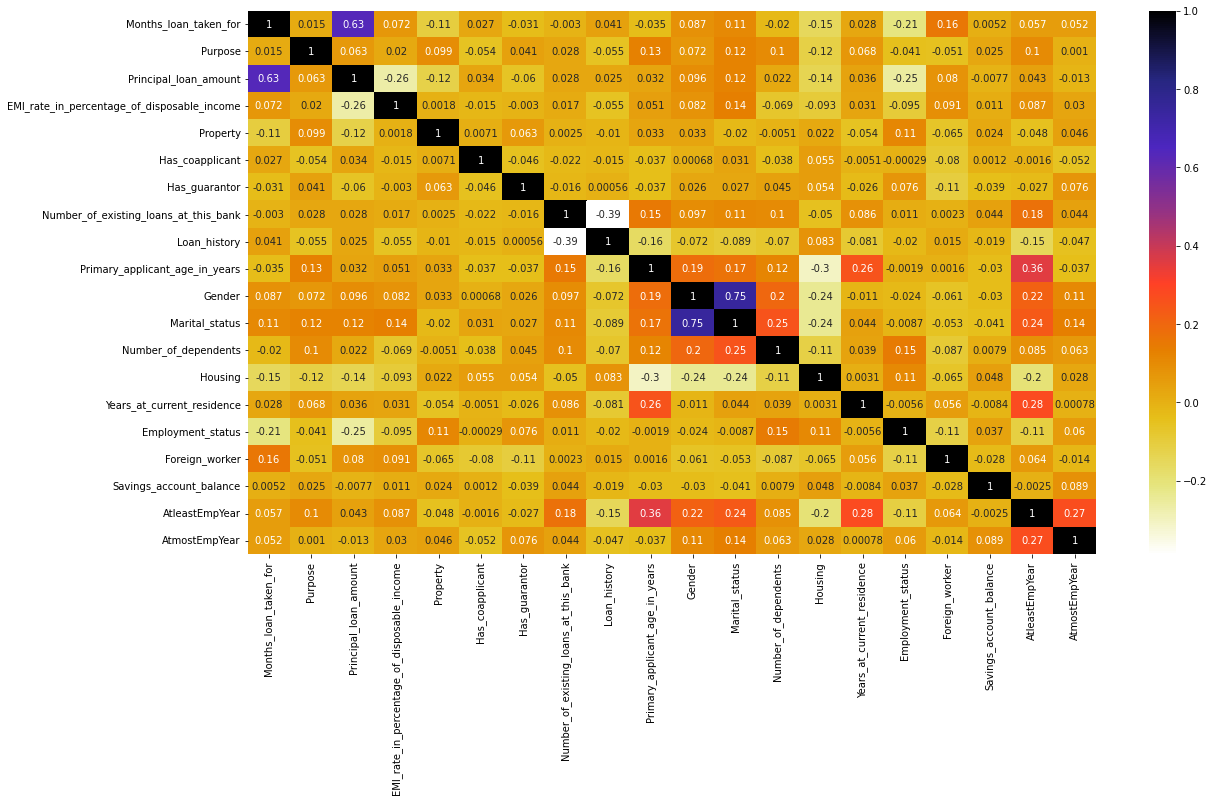

In [30]:
plt.figure(figsize=(19,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

As such no independent feature is there which is highly co-related 

### **Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 948 to 695
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Months_loan_taken_for                        937 non-null    int64
 1   Purpose                                      937 non-null    int64
 2   Principal_loan_amount                        937 non-null    int64
 3   EMI_rate_in_percentage_of_disposable_income  937 non-null    int64
 4   Property                                     937 non-null    int64
 5   Has_coapplicant                              937 non-null    int64
 6   Has_guarantor                                937 non-null    int64
 7   Number_of_existing_loans_at_this_bank        937 non-null    int64
 8   Loan_history                                 937 non-null    int64
 9   Primary_applicant_age_in_years               937 non-null    int64
 10  Gender                  

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

In [35]:
predictions = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report


In [37]:
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.72      0.97      0.83        35\n           1       0.67      0.13      0.22        15\n\n    accuracy                           0.72        50\n   macro avg       0.70      0.55      0.53        50\nweighted avg       0.71      0.72      0.65        50\n'

**Accuracy by Logistic Regression = 0.72**

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predictions))

[[34  1]
 [13  2]]


### **Decision Tree**

In [39]:
%matplotlib inline

In [40]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
y_pred_gini = clf_gini.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7270


In [45]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7110


In [47]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7110
Test set score: 0.7270


[Text(0.5, 0.875, 'X[9] <= 34.5\ngini = 0.423\nsamples = 661\nvalue = [460, 201]'),
 Text(0.25, 0.625, 'X[19] <= 1.5\ngini = 0.468\nsamples = 365\nvalue = [229, 136]'),
 Text(0.125, 0.375, 'X[2] <= 8503000.0\ngini = 0.5\nsamples = 122\nvalue = [62, 60]'),
 Text(0.0625, 0.125, 'gini = 0.498\nsamples = 116\nvalue = [62, 54]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.375, 'X[0] <= 37.5\ngini = 0.43\nsamples = 243\nvalue = [167, 76]'),
 Text(0.3125, 0.125, 'gini = 0.406\nsamples = 219\nvalue = [157, 62]'),
 Text(0.4375, 0.125, 'gini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(0.75, 0.625, 'X[8] <= 1.5\ngini = 0.343\nsamples = 296\nvalue = [231, 65]'),
 Text(0.625, 0.375, 'X[8] <= 0.5\ngini = 0.224\nsamples = 132\nvalue = [115, 17]'),
 Text(0.5625, 0.125, 'gini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.6875, 0.125, 'gini = 0.159\nsamples = 115\nvalue = [105, 10]'),
 Text(0.875, 0.375, 'X[0] <= 11.5\ngini = 0.414\nsamples = 164\nvalue = [1

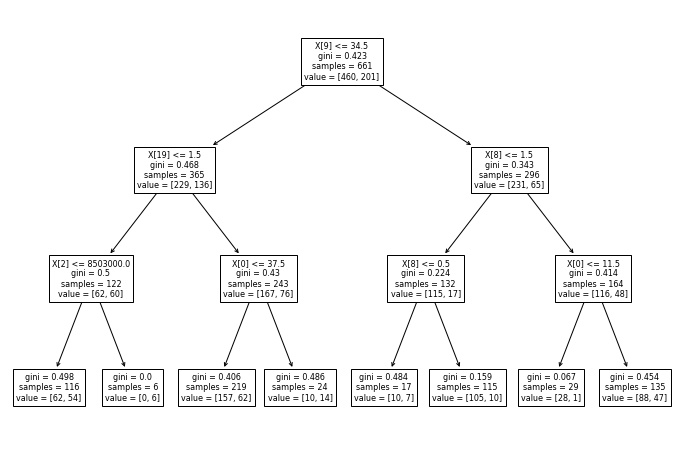

In [48]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train))

**Primary Applicant age**, **Loan History** , **AtmostEmploymentYear** are more **co-related** to the dependent variable that is **high-risk-applicant**

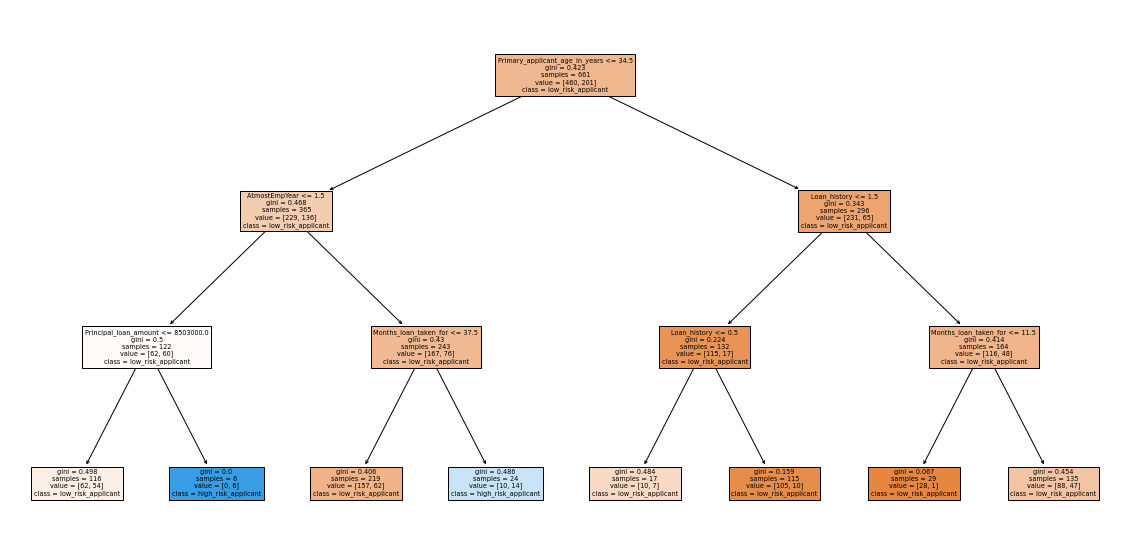

In [49]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=X.columns, class_names=['low_risk_applicant', 'high_risk_applicant'], filled=True);

In [50]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [51]:
y_pred_en = clf_en.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7209


In [53]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7050


In [55]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.7050
Test set score: 0.7209


[Text(0.5, 0.875, 'X[9] <= 34.5\nentropy = 0.886\nsamples = 661\nvalue = [460, 201]'),
 Text(0.25, 0.625, 'X[19] <= 1.5\nentropy = 0.953\nsamples = 365\nvalue = [229, 136]'),
 Text(0.125, 0.375, 'X[2] <= 8503000.0\nentropy = 1.0\nsamples = 122\nvalue = [62, 60]'),
 Text(0.0625, 0.125, 'entropy = 0.997\nsamples = 116\nvalue = [62, 54]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.375, 'X[0] <= 7.5\nentropy = 0.896\nsamples = 243\nvalue = [167, 76]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.915\nsamples = 230\nvalue = [154, 76]'),
 Text(0.75, 0.625, 'X[8] <= 1.5\nentropy = 0.759\nsamples = 296\nvalue = [231, 65]'),
 Text(0.625, 0.375, 'X[8] <= 0.5\nentropy = 0.554\nsamples = 132\nvalue = [115, 17]'),
 Text(0.5625, 0.125, 'entropy = 0.977\nsamples = 17\nvalue = [10, 7]'),
 Text(0.6875, 0.125, 'entropy = 0.426\nsamples = 115\nvalue = [105, 10]'),
 Text(0.875, 0.375, 'X[0] <= 11.5\nentrop

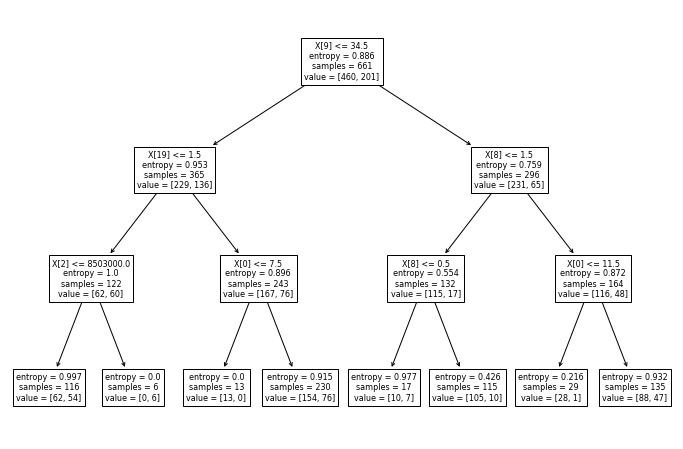

In [56]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train)) 

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[232   0]
 [ 91   3]]


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       232
           1       1.00      0.03      0.06        94

    accuracy                           0.72       326
   macro avg       0.86      0.52      0.45       326
weighted avg       0.80      0.72      0.61       326



### **Hyperparameter tuning**

In [59]:
# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}
# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
# Prediction sets
preds_1 = model_1.predict(x_test)
preds_2 = model_3.predict(x_test)
preds_3 = model_3.predict(x_test)
preds_4 = model_4.predict(x_test)
preds_5 = model_5.predict(x_test)
print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(y_test, preds_3), 3)}')
print(f'Accuracy on Model 4: {round(accuracy_score(y_test, preds_4), 3)}')
print(f'Accuracy on Model 5: {round(accuracy_score(y_test, preds_5), 3)}')

Accuracy on Model 1: 0.663
Accuracy on Model 2: 0.601
Accuracy on Model 3: 0.601
Accuracy on Model 4: 0.66
Accuracy on Model 5: 0.669


### **Random Forest**

In [60]:
xx_train, xx_test, yy_train, yy_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xx_train = sc.fit_transform(xx_train)
xx_test = sc.transform(xx_test)

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(xx_train, yy_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [63]:
y_pred = classifier.predict(xx_test) 
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yy_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(yy_test, y_pred))
cm

Accuracy :  0.7070707070707071


array([[129,  12],
       [ 46,  11]])

**Accuracy of RandomForestClassifier = 0.7070707070707071**

In [65]:

df = pd.DataFrame({'Real Values':yy_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
315,1,0
143,1,0
508,0,1
866,0,0
91,0,0
...,...,...
668,1,0
638,0,0
465,0,0
545,1,0


### **KNN**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(xx_train, yy_train)

KNeighborsClassifier()

In [67]:
yy_pred = classifier.predict(xx_test) 
yy_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [68]:
from sklearn.metrics import confusion_matrix
cmm = confusion_matrix(yy_test, yy_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(yy_test, yy_pred))
cmm

Accuracy :  0.7272727272727273


array([[128,  13],
       [ 41,  16]])

**Accuracy of KNN :  0.7272727272727273**

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

### **Gradient Boosting Classifier**

In [70]:
xX_train, xX_val, yY_train, yY_val = train_test_split(X_train, Y_train,  
    test_size=0.2, random_state=12)

In [71]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xX_train, yY_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xX_train, yY_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xX_val, yY_val)))

Learning rate:  0.05
Accuracy score (training): 0.720
Accuracy score (validation): 0.628
Learning rate:  0.075
Accuracy score (training): 0.721
Accuracy score (validation): 0.617
Learning rate:  0.1
Accuracy score (training): 0.732
Accuracy score (validation): 0.612
Learning rate:  0.25
Accuracy score (training): 0.773
Accuracy score (validation): 0.628
Learning rate:  0.5
Accuracy score (training): 0.778
Accuracy score (validation): 0.633
Learning rate:  0.75
Accuracy score (training): 0.790
Accuracy score (validation): 0.686
Learning rate:  1
Accuracy score (training): 0.809
Accuracy score (validation): 0.654


In [72]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(xX_train, yY_train)
predictions = gb_clf2.predict(xX_val)

print("Confusion Matrix:")
print(confusion_matrix(yY_val, predictions))

print("Classification Report")
print(classification_report(yY_val, predictions))

Confusion Matrix:
[[109   9]
 [ 60  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.92      0.76       118
           1       0.53      0.14      0.22        70

    accuracy                           0.63       188
   macro avg       0.59      0.53      0.49       188
weighted avg       0.60      0.63      0.56       188



In [73]:
from xgboost import XGBClassifier

In [74]:
xgb_clf = XGBClassifier()
xgb_clf.fit(xX_train, yY_train)

XGBClassifier()

In [75]:
score = xgb_clf.score(xX_val, yY_val)
print(score)

0.6702127659574468
